# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import json
import requests
import csv
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import random
import openweathermapy.core as owm
import scipy.stats as st

from scipy.stats import sem
from scipy.stats import linregress
from sklearn.metrics import r2_score
from matplotlib.pyplot import figure
from openweathermap_requests import OpenWeatherMapRequests
from citipy import citipy
from pprint import pprint
from api_keys import weather_api_key
from api_keys import g_key


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Lists for results
latitude_longitude = []
cities_list = []

# Get random latitude and longitude coordinates
Latitude = np.random.uniform(lat_range[0], lat_range[1], size=1600)
Longitude = np.random.uniform(lng_range[0], lng_range[1], size=1600)
latitude_longitude = zip(Latitude, Longitude)

# Get nearest city for each latitude and longitude coordinate
for lat_lng in latitude_longitude:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Add only unique cities to cities list
    if city not in cities_list:
        cities_list.append(city)

# Print number of cities 
len(cities_list)

655

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" # to get temperature in fahrenheit and mph

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
print("Beginning Data Retrieval ")
print("-------------------------------")


# set up lists to hold reponse info
city_weather_data = []
city = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
date = []
country = []

index_counter = 0
set_counter = 1

# Loop through the list of cities and perform a request for data on each
for city in cities_list:
    
    try:
        # Get weather data
        weather_response = requests.get(query_url + city)
        weather_json = weather_response.json()# Get data from JSON response
    
        latitude = weather_json['coord']['lat']
        longitude = weather_json['coord']['lon']
        temperature = weather_json['main']['temp_max']
        humidity = weather_json['main']['humidity']
        cloudiness = weather_json['clouds']['all']
        wind_speed = weather_json['wind']['speed']
        city = weather_json['name']
        country = weather_json['sys']['country']
        date = weather_json['dt']
        
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
            
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
    
        # Append the City information into city_data list
        city_weather_data.append({"City": city, 
                                  "Cloudiness": cloudiness,
                                  "Country": country,
                                  "Date": date,
                                  "Humidity": humidity,
                                  "Lat": latitude,
                                  "Lng": longitude,
                                  "Max Temp": temperature,
                                  "Wind Speed": wind_speed})
                
    # If no record found "skip" to next call
    except:
        print("KeyError: City not found. Skipping...")
    #continue  
    
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval 
-------------------------------
Processing Record 1 of Set 1 : Samarai
Processing Record 2 of Set 1 : Geraldton
Processing Record 3 of Set 1 : Qaanaaq
Processing Record 4 of Set 1 : Ladário
Processing Record 5 of Set 1 : Avarua
Processing Record 6 of Set 1 : Sorong
Processing Record 7 of Set 1 : Derzhavīnsk
Processing Record 8 of Set 1 : Port Alfred
Processing Record 9 of Set 1 : Chokurdakh
KeyError: City not found. Skipping...
Processing Record 10 of Set 1 : Atuona
Processing Record 11 of Set 1 : Ben Gardane
Processing Record 12 of Set 1 : Tiksi
Processing Record 13 of Set 1 : Preobrazheniye
Processing Record 14 of Set 1 : Busselton
Processing Record 15 of Set 1 : Dicabisagan
Processing Record 16 of Set 1 : Katsuura
Processing Record 17 of Set 1 : Castro
Processing Record 18 of Set 1 : Arraial do Cabo
Processing Record 19 of Set 1 : Fonte Boa
Processing Record 20 of Set 1 : Bluff
Processing Record 21 of Set 1 : Corsicana
Processing Record 22 of Set 1 : Carnar

Processing Record 31 of Set 4 : Bambous Virieux
KeyError: City not found. Skipping...
Processing Record 32 of Set 4 : Upernavik
Processing Record 33 of Set 4 : Abalak
Processing Record 34 of Set 4 : Benxi
Processing Record 35 of Set 4 : Grinnell
Processing Record 36 of Set 4 : Stabat
Processing Record 37 of Set 4 : Faanui
Processing Record 38 of Set 4 : Namwala
KeyError: City not found. Skipping...
Processing Record 39 of Set 4 : Praia
Processing Record 40 of Set 4 : Mar del Plata
KeyError: City not found. Skipping...
Processing Record 41 of Set 4 : Syracuse
Processing Record 42 of Set 4 : Cherskiy
Processing Record 43 of Set 4 : Clyde River
Processing Record 44 of Set 4 : Øksfjord
Processing Record 45 of Set 4 : Pueblo
Processing Record 46 of Set 4 : Mount Isa
Processing Record 47 of Set 4 : Torata
KeyError: City not found. Skipping...
Processing Record 48 of Set 4 : Isangel
Processing Record 49 of Set 4 : Fortuna
Processing Record 50 of Set 4 : Usinsk
Processing Record 0 of Set 5 : I

Processing Record 9 of Set 8 : Caohai
KeyError: City not found. Skipping...
KeyError: City not found. Skipping...
Processing Record 10 of Set 8 : Mangalore
Processing Record 11 of Set 8 : Turaif
Processing Record 12 of Set 8 : Petatlán
Processing Record 13 of Set 8 : Ilulissat
Processing Record 14 of Set 8 : Moyale
Processing Record 15 of Set 8 : Cacoal
Processing Record 16 of Set 8 : Zaysan
Processing Record 17 of Set 8 : Doha
Processing Record 18 of Set 8 : Oktyabr'skiy
Processing Record 19 of Set 8 : Santa Elena
Processing Record 20 of Set 8 : Klaksvík
Processing Record 21 of Set 8 : Santiago del Estero
Processing Record 22 of Set 8 : Sinnamary
Processing Record 23 of Set 8 : Phalodi
Processing Record 24 of Set 8 : Tambura
Processing Record 25 of Set 8 : Pasewalk
Processing Record 26 of Set 8 : Vostok
KeyError: City not found. Skipping...
Processing Record 27 of Set 8 : Las Choapas
Processing Record 28 of Set 8 : Camaçari
Processing Record 29 of Set 8 : Vao
Processing Record 30 of S

Processing Record 35 of Set 11 : Conde
Processing Record 36 of Set 11 : Makushino
Processing Record 37 of Set 11 : Impfondo
Processing Record 38 of Set 11 : Gilbués
Processing Record 39 of Set 11 : Kumul
Processing Record 40 of Set 11 : Lalibela
Processing Record 41 of Set 11 : São José da Coroa Grande
Processing Record 42 of Set 11 : Neiafu
Processing Record 43 of Set 11 : Neyshabur
Processing Record 44 of Set 11 : Rovaniemi
Processing Record 45 of Set 11 : Coromandel
Processing Record 46 of Set 11 : Beberibe
Processing Record 47 of Set 11 : Igarka
Processing Record 48 of Set 11 : Haines Junction
Processing Record 49 of Set 11 : Shuangcheng
Processing Record 50 of Set 11 : Sitka
Processing Record 0 of Set 12 : Ikryanoye
Processing Record 1 of Set 12 : Airai
Processing Record 2 of Set 12 : Mount Barker
Processing Record 3 of Set 12 : Cabedelo
Processing Record 4 of Set 12 : Daugai
Processing Record 5 of Set 12 : Kulhudhuffushi
Processing Record 6 of Set 12 : Tres Arroyos
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data = pd.DataFrame(city_weather_data)
city_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Samarai,74,PG,1616217739,73,-10.6167,150.6667,84.61,9.57
1,Geraldton,0,AU,1616217739,11,-28.7667,114.6000,102.20,5.75
2,Qaanaaq,100,GL,1616217672,97,77.4840,-69.3632,-6.65,5.44
3,Ladário,100,BR,1616217741,96,-19.0047,-57.6017,73.04,2.46
4,Avarua,20,CK,1616217741,78,-21.2078,-159.7750,80.60,8.05
...,...,...,...,...,...,...,...,...,...
595,Voyvozh,100,RU,1616218179,93,62.8920,54.9635,17.40,4.88
596,Ondo,99,NG,1616218180,94,7.1000,4.8333,72.75,0.83
597,Conceição da Feira,38,BR,1616218181,97,-12.5058,-38.9986,70.07,3.38
598,Mana,26,GF,1616218182,84,5.6592,-53.7767,75.11,6.33


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
humidity100_df = city_data.loc[city_data["Humidity"] >= 100, :]
humidity100_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
24,Malbork,65,PL,1616217755,100,54.0359,19.0266,24.01,1.32
123,Humboldt,90,US,1616217826,100,40.6665,-123.9178,44.01,5.75
201,Fortuna,90,US,1616217885,100,40.5982,-124.1573,44.01,5.75
221,Torbay,90,CA,1616217898,100,47.6666,-52.7314,30.99,12.66
281,Griffith,1,US,1616217952,100,41.5284,-87.4237,30.00,3.38
413,Bonavista,100,CA,1616218047,100,48.6499,-53.1147,28.00,6.91
421,Zhezkazgan,75,KZ,1616218053,100,47.8043,67.7144,32.00,13.42
463,Kozan,75,TR,1616218083,100,37.4552,35.8157,55.00,4.61
545,Makushino,100,RU,1616218145,100,55.2103,67.2442,33.24,11.81
558,Shuangcheng,90,CN,1616218154,100,45.3500,126.2833,33.80,4.47


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(city_data.loc[city_data["Humidity"]>=100].index, inplace=False)
clean_city_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Samarai,74,PG,1616217739,73,-10.6167,150.6667,84.61,9.57
1,Geraldton,0,AU,1616217739,11,-28.7667,114.6000,102.20,5.75
2,Qaanaaq,100,GL,1616217672,97,77.4840,-69.3632,-6.65,5.44
3,Ladário,100,BR,1616217741,96,-19.0047,-57.6017,73.04,2.46
4,Avarua,20,CK,1616217741,78,-21.2078,-159.7750,80.60,8.05
...,...,...,...,...,...,...,...,...,...
595,Voyvozh,100,RU,1616218179,93,62.8920,54.9635,17.40,4.88
596,Ondo,99,NG,1616218180,94,7.1000,4.8333,72.75,0.83
597,Conceição da Feira,38,BR,1616218181,97,-12.5058,-38.9986,70.07,3.38
598,Mana,26,GF,1616218182,84,5.6592,-53.7767,75.11,6.33


In [8]:
clean_city_data.to_csv(r'output.csv', index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

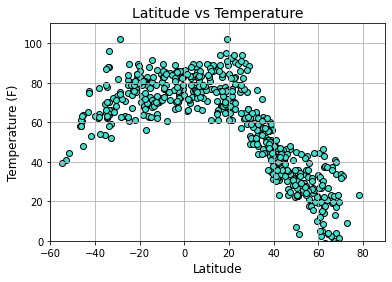

In [9]:
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Max Temp"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="turquoise", edgecolors="black")

plt.xlim(-60,90)
plt.ylim(0,110)

plt.title("Latitude vs Temperature", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Temperature (F)", fontsize=12)

plt.grid()
plt.show()

## Latitude vs. Humidity Plot

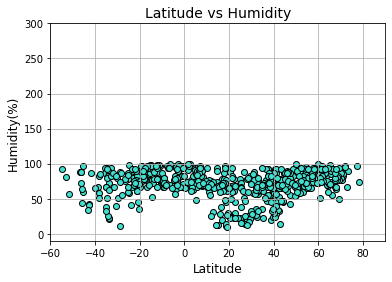

In [10]:
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Humidity"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="turquoise", edgecolors="black")

plt.xlim(-60,90)
plt.ylim(-10,300)

plt.title("Latitude vs Humidity", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity(%)", fontsize=12)

plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

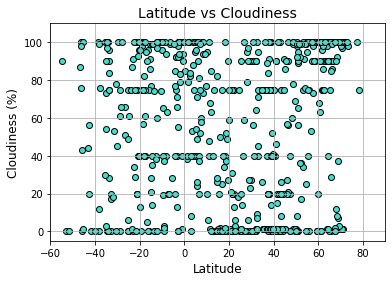

In [11]:
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Cloudiness"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="turquoise", edgecolors="black")

plt.xlim(-60,90)
plt.ylim(-5,110)

plt.title("Latitude vs Cloudiness", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)

plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

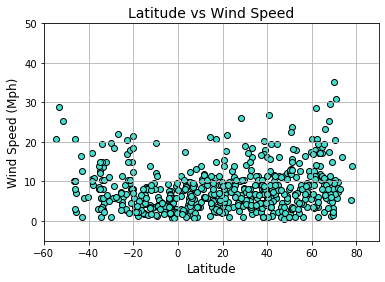

In [12]:
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Wind Speed"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="turquoise", edgecolors="black")

plt.xlim(-60,90)
plt.ylim(-5,50)

plt.title("Latitude vs Wind Speed", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (Mph)", fontsize=12)

plt.grid()
plt.show()

## Linear Regression

In [13]:
# Northern Hemisphere data
NorthHem_City_data = clean_city_data.drop(clean_city_data.loc[clean_city_data["Lat"] < 0].index, inplace=False)


In [14]:
# Southern Hemisphere data
SouthHem_City_data = clean_city_data.drop(clean_city_data.loc[clean_city_data["Lat"] > 0].index, inplace=False)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

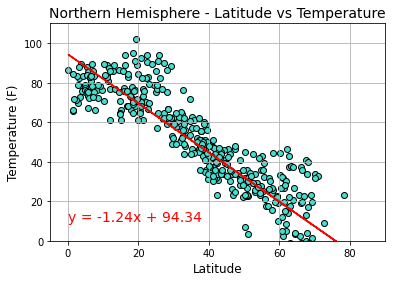

In [15]:
x_axis = NorthHem_City_data["Lat"]
y_axis = NorthHem_City_data["Max Temp"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="turquoise", edgecolors="black")

plt.xlim(-5,90)
plt.ylim(0,110)

plt.title("Northern Hemisphere - Latitude vs Temperature", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Temperature (F)", fontsize=12)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=14,color="red")


plt.grid()
plt.show()

In [16]:
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.7997855347664332


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

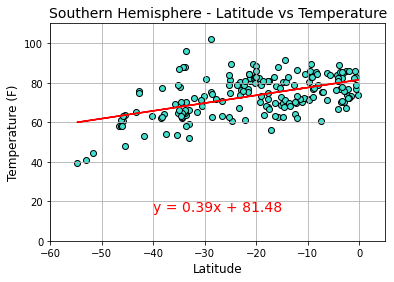

In [17]:
x_axis = SouthHem_City_data["Lat"]
y_axis = SouthHem_City_data["Max Temp"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="turquoise", edgecolors="black")

plt.xlim(-60,5)
plt.ylim(0,110)

plt.title("Southern Hemisphere - Latitude vs Temperature", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Temperature (F)", fontsize=12)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-40,15),fontsize=14,color="red")


plt.grid()
plt.show()

In [18]:
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.25893690762563726


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

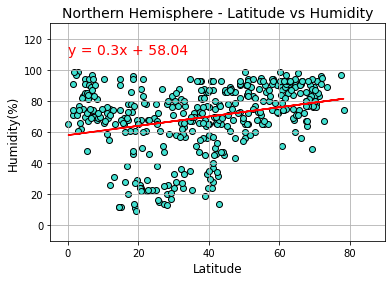

In [20]:
x_axis = NorthHem_City_data["Lat"]
y_axis = NorthHem_City_data["Humidity"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="turquoise", edgecolors="black")

plt.xlim(-5,90)
plt.ylim(-10,130)

plt.title("Northern Hemisphere - Latitude vs Humidity", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity(%)", fontsize=12)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,110),fontsize=14,color="red")


plt.grid()
plt.show()

In [21]:
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.07973755315834122


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

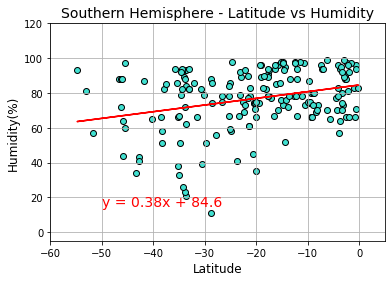

In [22]:
x_axis = SouthHem_City_data["Lat"]
y_axis = SouthHem_City_data["Humidity"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="turquoise", edgecolors="black")

plt.xlim(-60,5)
plt.ylim(-5,120)

plt.title("Southern Hemisphere - Latitude vs Humidity", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity(%)", fontsize=12)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=14,color="red")


plt.grid()
plt.show()

In [23]:
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.08862093988577846


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

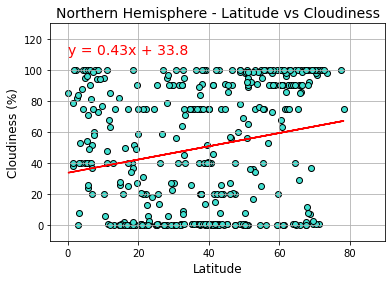

In [25]:
x_axis = NorthHem_City_data["Lat"]
y_axis = NorthHem_City_data["Cloudiness"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="turquoise", edgecolors="black")

plt.xlim(-5,90)
plt.ylim(-10,130)

plt.title("Northern Hemisphere - Latitude vs Cloudiness", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,110),fontsize=14,color="red")


plt.grid()
plt.show()

In [26]:
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.04653150682476145


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

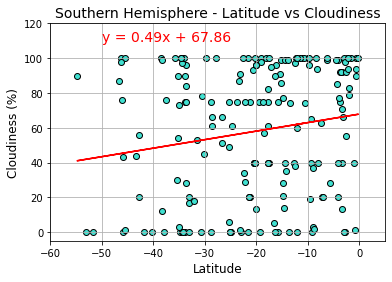

In [27]:
x_axis = SouthHem_City_data["Lat"]
y_axis = SouthHem_City_data["Cloudiness"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="turquoise", edgecolors="black")

plt.xlim(-60,5)
plt.ylim(-5,120)

plt.title("Southern Hemisphere - Latitude vs Cloudiness", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,110),fontsize=14,color="red")


plt.grid()
plt.show()

In [28]:
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.030027588391204108


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

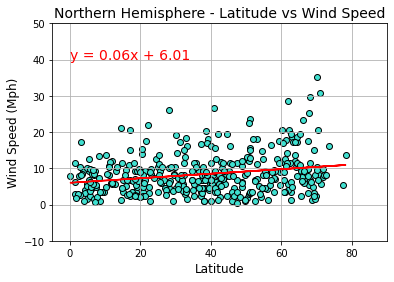

In [30]:
x_axis = NorthHem_City_data["Lat"]
y_axis = NorthHem_City_data["Wind Speed"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="turquoise", edgecolors="black")

plt.xlim(-5,90)
plt.ylim(-10,50)

plt.title("Northern Hemisphere - Latitude vs Wind Speed", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (Mph)", fontsize=12)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=14,color="red")


plt.grid()
plt.show()

In [31]:
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.05263966150445962


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

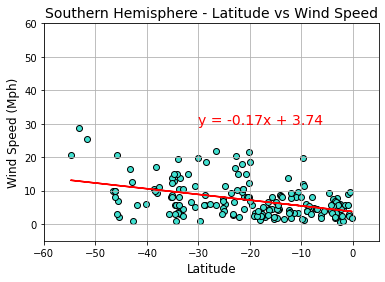

In [32]:
x_axis = SouthHem_City_data["Lat"]
y_axis = SouthHem_City_data["Wind Speed"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="turquoise", edgecolors="black")

plt.xlim(-60,5)
plt.ylim(-5,60)

plt.title("Southern Hemisphere - Latitude vs Wind Speed", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (Mph)", fontsize=12)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=14,color="red")


plt.grid()
plt.show()

In [33]:
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.18258574441705241
